# BMW Sales

In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.compose import ColumnTransformer

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [2]:
# loading dataset
df = pd.read_csv(r"C:\ML Datasets\BMW sales data (2010-2024) (1) (1).csv")
df

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low
...,...,...,...,...,...,...,...,...,...,...,...
49995,i3,2014,Asia,Red,Hybrid,Manual,4.6,151030,42932,8182,High
49996,i3,2023,Middle East,Silver,Electric,Manual,4.2,147396,48714,9816,High
49997,5 Series,2010,Middle East,Red,Petrol,Automatic,4.5,174939,46126,8280,High
49998,i3,2020,Asia,White,Electric,Automatic,3.8,3379,58566,9486,High


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  object 
 1   Year                  50000 non-null  int64  
 2   Region                50000 non-null  object 
 3   Color                 50000 non-null  object 
 4   Fuel_Type             50000 non-null  object 
 5   Transmission          50000 non-null  object 
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  int64  
 8   Price_USD             50000 non-null  int64  
 9   Sales_Volume          50000 non-null  int64  
 10  Sales_Classification  50000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 4.2+ MB


In [4]:
df.isnull().sum()

Model                   0
Year                    0
Region                  0
Color                   0
Fuel_Type               0
Transmission            0
Engine_Size_L           0
Mileage_KM              0
Price_USD               0
Sales_Volume            0
Sales_Classification    0
dtype: int64

In [5]:
# setting features and target
x = df.drop(columns="Sales_Classification")
y = df["Sales_Classification"]

In [6]:
# train test split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42,stratify=y)
print("Train Size :", X_train.shape,y_train.shape)
print("Test Size :", X_test.shape,y_test.shape)

Train Size : (37500, 10) (37500,)
Test Size : (12500, 10) (12500,)


In [7]:
# seperating numerical and categorical features
num_feature = []
cat_feature = []

for i in df.columns:
    if df[i].dtypes != "object":
        num_feature.append(i)
    elif i == "Sales_Classification":
            continue
    else:
        cat_feature.append(i)

print("numerical features :", num_feature)
print("categorical feature :", cat_feature)

numerical features : ['Year', 'Engine_Size_L', 'Mileage_KM', 'Price_USD', 'Sales_Volume']
categorical feature : ['Model', 'Region', 'Color', 'Fuel_Type', 'Transmission']


In [8]:
# seting pipeline
num_transformer = Pipeline(steps=[
    ("scaler",StandardScaler())
])
cat_transformer = Pipeline(steps=[
    ("onehot",OneHotEncoder(handle_unknown="ignore"))
])

In [9]:
# using column transformer 
preprocessor = ColumnTransformer(transformers=[
    ("num",num_transformer,num_feature),
    ("cat",cat_transformer,cat_feature)
])

In [10]:
# fitting and evaluating model
model = Pipeline(steps=[
    ("preprocessor",preprocessor),
    ("knn_clf",KNeighborsClassifier(n_neighbors=7))
])

In [11]:
model

,steps,"[('preprocessor', ...), ('knn_clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [12]:
# fiting model
model.fit(X_train,y_train)

,steps,"[('preprocessor', ...), ('knn_clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [13]:
# evaluating model
y_pred = model.predict(X_test)
acc = accuracy_score(y_test,y_pred)
print(f"Accuracy Score : {acc:.4f}")

Accuracy Score : 0.9294


In [14]:
print("confusion matrix :\n",confusion_matrix(y_test,y_pred))
print("\nclassification report :\n",classification_report(y_test,y_pred))

confusion matrix :
 [[3309  502]
 [ 380 8309]]

classification report :
               precision    recall  f1-score   support

        High       0.90      0.87      0.88      3811
         Low       0.94      0.96      0.95      8689

    accuracy                           0.93     12500
   macro avg       0.92      0.91      0.92     12500
weighted avg       0.93      0.93      0.93     12500



In [15]:
# model hypertunng
param_grid = {
    "knn_clf__n_neighbors" : [1,3,5,7,9],
    "knn_clf__weights" : ["uniform","distance"],
    "knn_clf__p" : [1,2,3]
}

grid = GridSearchCV(estimator=model,param_grid=param_grid,cv=3,n_jobs=1,verbose=2,scoring="accuracy")
grid.fit(X_train,y_train)

print("Best Parameter :",grid.best_params_)
print("Best Score :", grid.best_score_)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV] END knn_clf__n_neighbors=1, knn_clf__p=1, knn_clf__weights=uniform; total time=   1.5s
[CV] END knn_clf__n_neighbors=1, knn_clf__p=1, knn_clf__weights=uniform; total time=   0.2s
[CV] END knn_clf__n_neighbors=1, knn_clf__p=1, knn_clf__weights=uniform; total time=   0.2s
[CV] END knn_clf__n_neighbors=1, knn_clf__p=1, knn_clf__weights=distance; total time=  33.6s
[CV] END knn_clf__n_neighbors=1, knn_clf__p=1, knn_clf__weights=distance; total time=  16.4s
[CV] END knn_clf__n_neighbors=1, knn_clf__p=1, knn_clf__weights=distance; total time=  16.2s
[CV] END knn_clf__n_neighbors=1, knn_clf__p=2, knn_clf__weights=uniform; total time=  15.7s
[CV] END knn_clf__n_neighbors=1, knn_clf__p=2, knn_clf__weights=uniform; total time=  15.5s
[CV] END knn_clf__n_neighbors=1, knn_clf__p=2, knn_clf__weights=uniform; total time=  15.3s
[CV] END knn_clf__n_neighbors=1, knn_clf__p=2, knn_clf__weights=distance; total time=  14.4s
[CV] END knn_cl

In [16]:
best_model = grid.best_estimator_
y_test_pred = best_model.predict(X_test)
acc_best = accuracy_score(y_test,y_test_pred)
print(f"Accuracy Score(Best Model) : {acc_best:.4f}")

Accuracy Score(Best Model) : 0.9344


In [17]:
new_data = pd.DataFrame([{
    "Model" : "X5",
    "Year" : 2019,
    "Region" : "Middle East",
    "Color" : "Black",
    "Fuel_Type" : "Hybrid",
    "Transmission" : "Manual",
    "Engine_Size_L" : 4.5,
    "Mileage_KM" : 200000,
    "Price_USD" : 100000,
    "Sales_Volume" : 5000
}])

new_pred = best_model.predict(new_data)
new_probab = best_model.predict_proba(new_data)
print("Model Prediction :", new_pred)
print("Model Probability :", new_probab)

Model Prediction : ['Low']
Model Probability : [[0.22222222 0.77777778]]


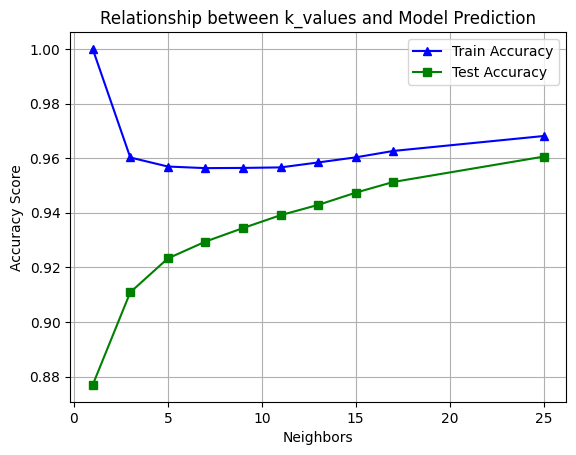

In [32]:
# graph showing relationship between k_values and model prediction
k_values = [1,3,5,7,9,11,13,15,17,25]
train_acc = []
test_acc = []
for k in k_values:
    best_model.set_params(knn_clf__n_neighbors=k)
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)
    train_acc.append(accuracy_score(y_train,y_train_pred))
    test_acc.append(accuracy_score(y_test,y_test_pred))

plt.plot(k_values,train_acc,marker="^",label="Train Accuracy",color="blue")
plt.plot(k_values,test_acc,marker="s",label="Test Accuracy",color="green")
plt.xlabel("Neighbors")
plt.ylabel("Accuracy Score")
plt.title("Relationship between k_values and Model Prediction")
plt.legend()
plt.grid(True)
plt.show()